In [1]:
import sympy as smp

r1, r2 = smp.symbols('r1 r2 ', real=True, positive=True)
theta = smp.symbols('theta')
theta1, phi1 = smp.symbols('theta_1 phi_1')
theta2, phi2 = smp.symbols('theta_2 phi_2')

x1 = smp.Function(r'x1')(r1, theta1, phi1)
x2 = smp.Function(r'x2')(r2, theta2, phi2)

y1 = smp.Function(r'y1')(r1, theta1, phi1)
y2 = smp.Function(r'y2')(r2, theta2, phi2)

z1 = smp.Function(r'z1')(r1, theta1)
z2 = smp.Function(r'z2')(r2, theta2)

Psi = smp.Function('Psi')(r1, theta1, phi1, r2, theta2, phi2)
V = smp.Function('V')(r1, theta1, phi1, r2, theta2, phi2)
absolute_diff = smp.sqrt(r1**2 + r2**2 - 2*r1*r2*smp.cos(theta))

In [2]:
V_eff = -2/r1 - 2/r2 + 1/(absolute_diff)
Laplacian = - 1/2 * (1/r1**2) * smp.diff(r1**2 * smp.diff(Psi, r1), r1) - 1/2 * (1/r2**2) * smp.diff(r2**2 * smp.diff(Psi, r2), r2) - 1/2 * (1/(r1**2 * smp.sin(theta1))) * smp.diff(smp.sin(theta1) * smp.diff(Psi, theta1), theta1) - 1/2 * (1/(r2**2 * smp.sin(theta2))) * smp.diff(smp.sin(theta2) * smp.diff(Psi, theta2), theta2) - 1/2 * (1/(r1**2 * smp.sin(theta1)**2)) * smp.diff(smp.diff(Psi, phi1), phi1) - 1/2 * (1/(r2**2 * smp.sin(theta2)**2)) * smp.diff(smp.diff(Psi, phi2), phi2)

In [3]:
x1 = r1 * smp.sin(theta1) * smp.cos(phi1)
x2 = r2 * smp.sin(theta2) * smp.cos(phi2)

y1 = r1 * smp.sin(theta1) * smp.sin(phi1)
y2 = r2 * smp.sin(theta2) * smp.sin(phi2)

z1 = r1 * smp.cos(theta1)
z2 = r2 * smp.cos(theta2)

In [4]:
Phi_1 = smp.Function('\Phi_1')(r1,theta1, phi1, r2, theta2, phi2)
Phi_1 = smp.exp(-2 * (r1 + r2))

In [5]:
# r1 and r2 vector in cartesian coordinates
r1_cartesian = smp.Matrix([x1, y1, z1])
r2_cartesian = smp.Matrix([x2, y2, z2])

# Compute the dot product
dot_product = r1_cartesian.dot(r2_cartesian)

# Compute the magnitude of r1 and r2
magnitude_r1 = smp.sqrt(x1**2 + y1**2 + z1**2)
magnitude_r2 = smp.sqrt(x2**2 + y2**2 + z2**2)

# Compute cos(theta) and sin(theta)
cos_theta = dot_product / (magnitude_r1 * magnitude_r2)
sin_theta = smp.sqrt(1 - cos_theta**2)

In [6]:
Phi_1 = Phi_1.subs(smp.sin(theta), sin_theta).subs(smp.cos(theta), cos_theta)

In [7]:
V_eff = V_eff.subs(smp.sin(theta), sin_theta).subs(smp.cos(theta), cos_theta)
Hamiltonian = Laplacian + V * Psi

In [8]:
H_Phi_1 = Hamiltonian.subs({Psi: Phi_1, V:V_eff}).simplify()

In [9]:
Num = (Phi_1 * H_Phi_1)  ## Numerator
Den = (Phi_1 * Phi_1)  ## Denominator

In [10]:
f_11 = Num * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
g_11 = Den * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

In [11]:
f_11 = f_11.simplify()
f_11

1.0*r1**2*r2**2*(-4.0 + 1.0/sqrt(r1**2 - 2*r1*r2*sin(theta_1)*sin(theta_2)*cos(phi_1 - phi_2) - 2*r1*r2*cos(theta_1)*cos(theta_2) + r2**2))*exp(-4*r1 - 4*r2)*sin(theta_1)*sin(theta_2)

In [12]:
g_11 = g_11.simplify()
g_11

r1**2*r2**2*exp(-4*r1 - 4*r2)*sin(theta_1)*sin(theta_2)

In [13]:
P = g_11
P

r1**2*r2**2*exp(-4*r1 - 4*r2)*sin(theta_1)*sin(theta_2)

In [14]:
f_11_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], f_11, 'numpy')
g_11_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], g_11, 'numpy')
P_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], P, 'numpy')
Num_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Num, 'numpy')
Den_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Den, 'numpy')

In [15]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def Sampling_func(r, mean_r):
  return (1 / 2 * np.pi**2) * (1/np.sqrt(2 * np.pi * 0.225)) * np.exp(-(r - mean_r)**2 / (2 * 0.225))

In [16]:
def f(X):
    r1, theta1, phi1, r2, theta2, phi2 = X  # Here X is a vector with 6 components

    if theta1 > np.pi:
      theta1 = np.pi - (theta1 - np.pi)

    if theta2 > np.pi:
      theta2 = np.pi - (theta2 - np.pi)

    if theta1 < 0:
      theta1 = -theta1

    if theta2 < 0:
      theta2 = -theta2

    if phi1 > 2*np.pi:
      phi1 = phi1 - 2*np.pi

    if phi2 > 2*np.pi:
      phi2 = phi2 - 2*np.pi

    if phi1 < 0:
      phi1 = phi1 + 2*np.pi

    if phi2 < 0:
      phi2 = phi2 + 2*np.pi

    result = f_11_f(r1, theta1, phi1, r2, theta2, phi2) # f_11_f was the lambdified function which converts symbolic expression into numpy arrays


        # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity

    else:
      return result


# Define the function
def g(X):
    r1, theta1, phi1, r2, theta2, phi2 = X

    if theta1 > np.pi:
      theta1 = np.pi - (theta1 - np.pi)

    if theta2 > np.pi:
      theta2 = np.pi - (theta2 - np.pi)

    if theta1 < 0:
      theta1 = -theta1

    if theta2 < 0:
      theta2 = -theta2

    if phi1 > 2*np.pi:
      phi1 = phi1 - 2*np.pi

    if phi2 > 2*np.pi:
      phi2 = phi2 - 2*np.pi

    if phi1 < 0:
      phi1 = phi1 + 2*np.pi

    if phi2 < 0:
      phi2 = phi2 + 2*np.pi

    result = g_11_f(r1, theta1, phi1, r2, theta2, phi2)

        # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf

    else:
      return result


def p(X):
    r1, theta1, phi1, r2, theta2, phi2 = X

    if theta1 > np.pi:
      theta1 = np.pi - (theta1 - np.pi)

    if theta2 > np.pi:
      theta2 = np.pi - (theta2 - np.pi)

    if theta1 < 0:
      theta1 = -theta1

    if theta2 < 0:
      theta2 = -theta2

    if phi1 > 2*np.pi:
      phi1 = phi1 - 2*np.pi

    if phi2 > 2*np.pi:
      phi2 = phi2 - 2*np.pi

    if phi1 < 0:
      phi1 = phi1 + 2*np.pi

    if phi2 < 0:
      phi2 = phi2 + 2*np.pi

    result_p = P_f(r1, theta1, phi1, r2, theta2, phi2)

        # Check for NaN or inf values
    if np.isnan(result_p) or np.isinf(result_p):
      return -np.inf

    else:
      return result_p

In [17]:
def metropolis_sampling(p, Sampling_func, initial_r, initial_theta, initial_phi, num_samples, proposal_std):

  current_r1, current_r2 = initial_r
  current_theta1, current_theta2 = initial_theta
  current_phi1, current_phi2 = initial_phi

  current = [current_r1, current_theta1, current_phi1, current_r2, current_theta2, current_phi2]
  samples = []
  num_accept = 0

  for i in range(num_samples):
    while True:

      candidate_theta1 = np.random.uniform(0, np.pi)
      candidate_theta2 = np.random.uniform(0, np.pi)

      candidate_phi1 = np.random.uniform(0, 2*np.pi)
      candidate_phi2 = np.random.uniform(0, 2*np.pi)

      candidate_r1 = np.random.normal(current_r1, proposal_std)
      candidate_r2 = np.random.normal(current_r2, proposal_std)


      if candidate_r1 >= 0 and candidate_r2 >= 0:

        candidate = [candidate_r1, candidate_theta1, candidate_phi1, candidate_r2, candidate_theta2, candidate_phi2]

        candidate_value_p = p(candidate)

        # Discard if candidate value is NaN or inf
        if candidate_value_p != -np.inf:
          break

    # Calculate acceptance probability
    acceptance_prob = min(1, ((candidate_value_p * Sampling_func(current_r1, candidate_r1) * Sampling_func(current_r2, candidate_r2)) / (p(current) * Sampling_func(candidate_r1, current_r1) * Sampling_func(candidate_r2, current_r2))))

    if np.random.uniform() < acceptance_prob:
      current_r1, current_r2 = candidate_r1, candidate_r2
      current_theta1, current_theta2 = candidate_theta1, candidate_theta2
      current_phi1, current_phi2 = candidate_phi1, candidate_phi2

      current = [candidate_r1, candidate_theta1, candidate_phi1, candidate_r2, candidate_theta2, candidate_phi2]
      num_accept += 1

    samples.append(current)

  return np.array(samples), num_accept

In [18]:
def Num(X):
  r1, theta1, phi1, r2, theta2, phi2 = X
  return Num_f(r1, theta1, phi1, r2, theta2, phi2)

def Den(X):
  r1, theta1, phi1, r2, theta2, phi2 = X
  return Den_f(r1, theta1, phi1, r2, theta2, phi2)

In [19]:
# Monte Carlo integration
def monte_carlo_integration(samples, Num_f, Den_f):

    values = np.array([Num(sample)/Den(sample) for sample in samples])
    # Filter out -inf values
    values = values[~np.isnan(values) & ~np.isinf(values)]

    return np.mean(values)

In [20]:
initial = [1.108, np.pi/4, np.pi/2, 1.522, 3*np.pi/8, np.pi/3]
initial_r = [initial[0], initial[3]]
initial_theta = [initial[1], initial[4]]
initial_phi = [initial[2], initial[5]]
num_samples = 1000000
proposal_std = 0.225

# Run Metropolis sampling
result = metropolis_sampling(p, Sampling_func, initial_r, initial_theta, initial_phi, num_samples, proposal_std)

samples = result[0]
num_accept = result[1]

burn_in = 50000
samples = samples[burn_in:]

E = monte_carlo_integration(samples, Num_f, Den_f)

print(f"Estimated E: {E}")
print("Number of Samples Collected: %s"%len(samples))
print("Number of Samples Accepted: %s"%(num_accept))
print("Fraction Acceptances: %s"%(num_accept / num_samples))

Estimated E: -2.7836666806328823
Number of Samples Collected: 950000
Number of Samples Accepted: 508940
Fraction Acceptances: 0.50894


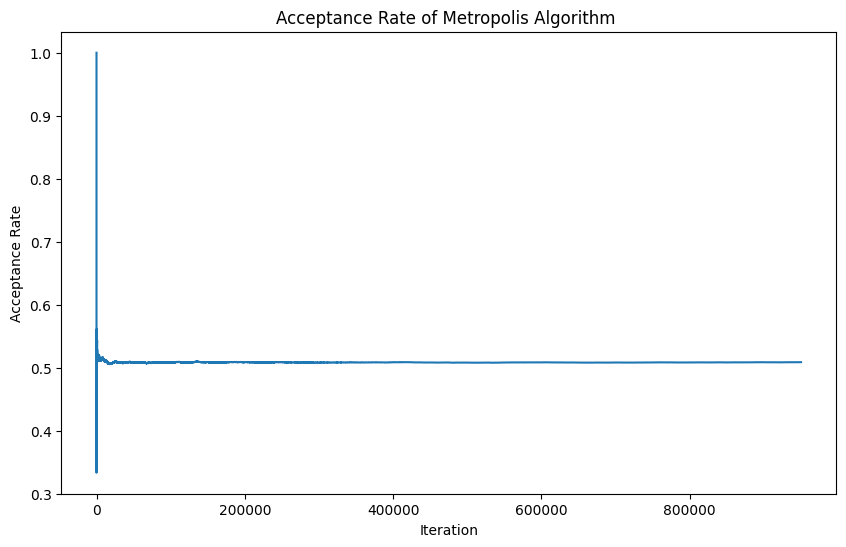

In [21]:
# Plotting the acceptance rate over iterations to understand the efficiency of the Metropolis algorithm. We plot the ratio of accepted moves to the total number of moves
# over iterations.

acceptance_rates = np.cumsum(np.diff(samples, axis=0).any(axis=1)) / np.arange(1, num_samples - 50000)
plt.figure(figsize=(10, 6))
plt.plot(acceptance_rates)
plt.xlabel('Iteration')
plt.ylabel('Acceptance Rate')
plt.title('Acceptance Rate of Metropolis Algorithm ')
plt.show()

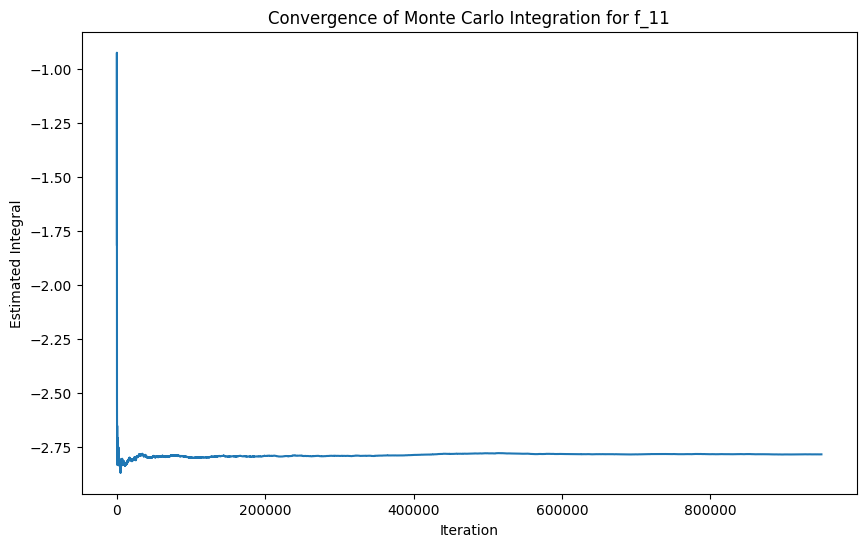

In [22]:
# Running mean of the integral estimate
values = np.array([Num(sample)/Den(sample) for sample in samples])
# Filter out -inf values
values = values[~np.isnan(values) & ~np.isinf(values)]

integral_estimates = np.cumsum(values) / np.arange(1, len(values) + 1)

plt.figure(figsize=(10, 6))
plt.plot(integral_estimates)
plt.xlabel('Iteration')
plt.ylabel('Estimated Integral')
plt.title('Convergence of Monte Carlo Integration for f_11')
plt.show()

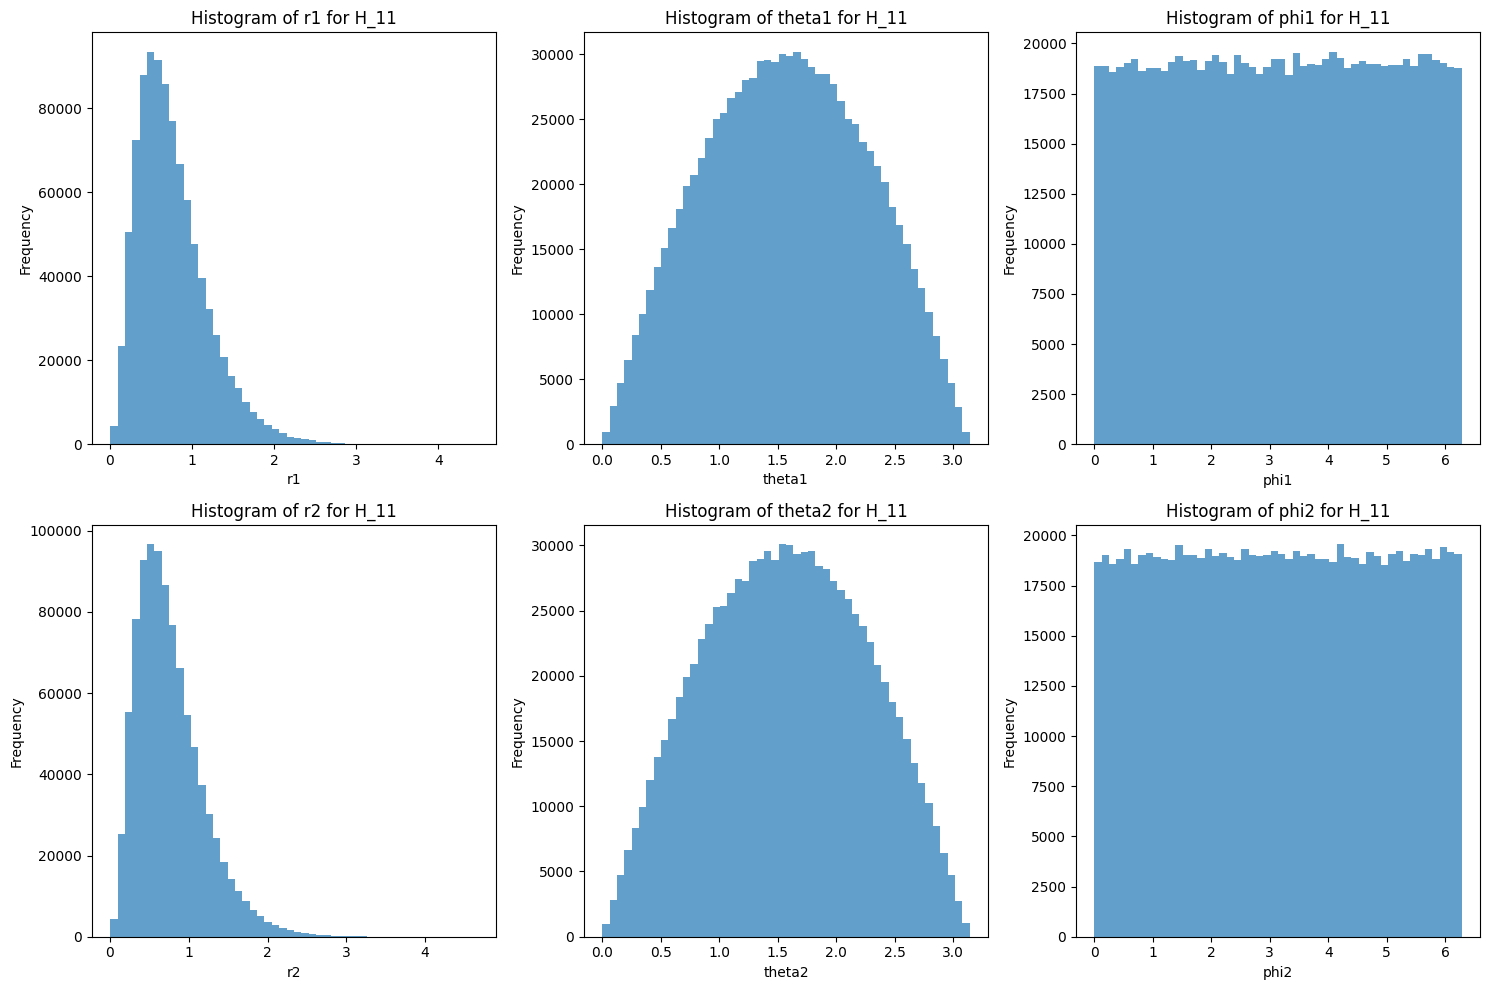

In [23]:
# Plotting histograms for each of the variables to see the distribution of the samples.
variables = ['r1', 'theta1', 'phi1', 'r2', 'theta2', 'phi2']
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.flatten()

for i in range(6):
    axs[i].hist(samples[:, i], bins=50, alpha=0.7)
    axs[i].set_title(f'Histogram of {variables[i]} for H_11')
    axs[i].set_xlabel(variables[i])
    axs[i].set_ylabel('Frequency')


plt.tight_layout()
plt.show()

In [24]:
# Previous work
# I obtained these values of Energy yesterday with burn_in = 100000 (I removed 100000 initial samples), proposal_std = 0.2

# -2.780425752948314
# -2.774813293924544
# -2.7822241842292645
# -2.7801022622186777
# -2.777883882747313
# -2.7739778072898185
# -2.7812808901573196
# -2.773781698846854
# -2.775329191988163
# -2.782791244906942
# -2.781673727114582

In [25]:
# Previous work
# I obtained these values of Energy today with burn_in = 17000 , proposal_std = 0.2

# -2.7811936253378717
# -2.778705420556884
# -2.777765156423219
# -2.781445864718603
# -2.777850745383681

In [26]:
# Current Work
# I obtained these values of Energy today with burn_in = 50000 , proposal_std = 0.225

# -2.787104800814754
# -2.7841044812179216
# -2.783879294968853
# -2.782092529970428
# -2.7876024747643533
# -2.7794608112772403
# -2.7854546584894875
# -2.7850549822728174
# -2.7803191280226236
# -2.7836666806328823

In [28]:
E = np.array([-2.787104800814754, -2.7841044812179216, -2.783879294968853, -2.782092529970428, -2.7876024747643533, -2.7794608112772403, -2.7854546584894875, -2.7850549822728174,
              -2.7803191280226236, -2.7836666806328823])
E_mean = np.mean(E) ## Mean of the Energy values obtained
E_std = np.std(E) ## Standard Deviation

print(f"Estimated E: {E_mean}")
print(f"Standard Deviation: {E_std}")

Estimated E: -2.783873984243136
Standard Deviation: 0.002522219543430611
